In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [28]:
data = pd.read_csv('ventas_tienda.csv')
print(data)

         Fecha     Producto  Precio  Cantidad    Categoria  Total_Venta
0    4/12/2024  Smartphonne  1197.0         3      Móviles       3591.0
1    9/27/2024      Laptopp  1053.0         2      Moviles       2106.0
2    4/16/2024  Smartphonne   591.0         4  Electrónica       2364.0
3    3/12/2024   Smartphone  1012.0         4  Electrónica       4048.0
4     7/7/2024  Smartphonne  1376.0         4  Electrónica       5504.0
..         ...          ...     ...       ...          ...          ...
305  1/21/2024       Tablet -5000.0         4  Electrónica     -20000.0
306  4/12/2024   Smartphone  1642.0         4  Electrónica       6568.0
307   5/1/2024   Smartphone  1297.0         4   Accesorios       5188.0
308   8/2/2024   Smartphone  1776.0         1      Moviles       1776.0
309  3/28/2024       Laptop  1291.0         3      Móviles       3873.0

[310 rows x 6 columns]


In [29]:
# 2. Limpieza de Datos

# a. Detectar y corregir valores nulos
data.dropna(inplace=True)  # Elimina filas con valores nulos (puedes usar otros métodos como imputación si es necesario)

# b. Corregir errores en nombres de productos y categorías (Ejemplo, puede que necesites ajustar esto según tu dataset)
data['Producto'] = data['Producto'].str.strip()  # Elimina espacios en blanco al inicio y final
data['Categoria'] = data['Categoria'].str.strip() # Elimina espacios en blanco al inicio y final

# c. Identificar y eliminar valores atípicos en las ventas (Ejemplo, usando el rango intercuartílico - IQR)
Q1 = data['Total_Venta'].quantile(0.25)
Q3 = data['Total_Venta'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Total_Venta'] >= lower_bound) & (data['Total_Venta'] <= upper_bound)]

# d. Eliminar filas duplicadas
data.drop_duplicates(inplace=True)

data

,Fecha,Producto,Precio,Cantidad,Categoria,Total_Venta
0,4/12/2024,Smartphonne,1197.0,3,Móviles,3591.0
1,9/27/2024,Laptopp,1053.0,2,Moviles,2106.0
2,4/16/2024,Smartphonne,591.0,4,Electrónica,2364.0
3,3/12/2024,Smartphone,1012.0,4,Electrónica,4048.0
4,7/7/2024,Smartphonne,1376.0,4,Electrónica,5504.0
...,...,...,...,...,...,...
294,2/23/2024,Tablet,210.0,2,Electrónica,420.0
296,6/22/2024,Smartphone,1786.0,4,Moviles,7144.0
297,10/6/2024,Smartphonne,1306.0,3,Móviles,3918.0
298,4/23/2024,Auriculares,947.0,4,Accesorios,3788.0


Top 10 Productos Más Vendidos


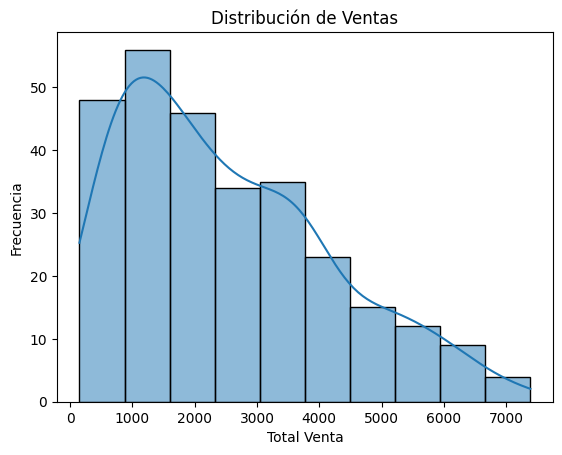

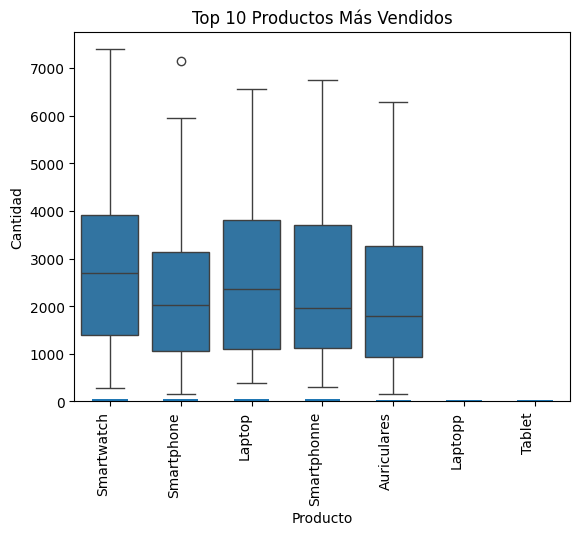

Ventas Totales por Categoría


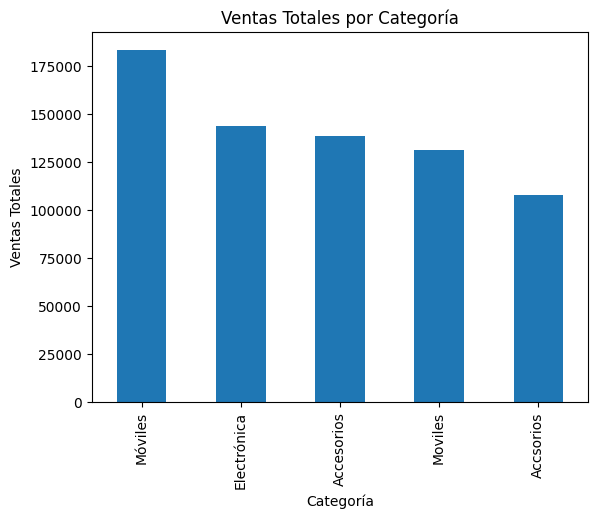

La factura total es: $704155.00
Distribución de Ventas


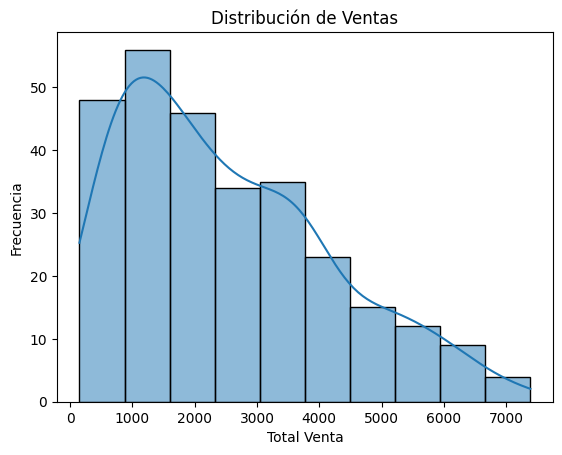

Ventas por Categoría (Boxplot)


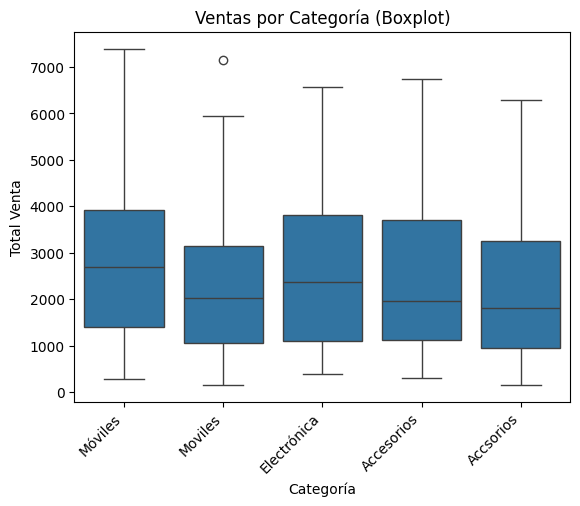

In [30]:
# 4. Análisis Exploratorio de Datos (EDA)

# a. Cantidad de productos vendidos (Top 10)
print("Top 10 Productos Más Vendidos")
cantidad_productos = data.groupby('Producto').size().sort_values(ascending=False).head(10)
cantidad_productos.plot(kind='bar', title="Top 10 Productos Más Vendidos")
plt.xlabel("Producto")
plt.ylabel("Cantidad")
plt.show()

# b. Ventas por Categoría
print("Ventas Totales por Categoría")
ventas_por_categoria = data.groupby('Categoria')['Total_Venta'].sum().sort_values(ascending=False)
ventas_por_categoria.plot(kind='bar', title="Ventas Totales por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Ventas Totales")
plt.show()

# c. Factura total
factura_total = data['Total_Venta'].sum()
print(f"La factura total es: ${factura_total:.2f}")

# d. Visualizaciones Adicionales

# Histograma de Distribución de Ventas
print("Distribución de Ventas")
fig_dist_ventas, ax_dist_ventas = plt.subplots()
sns.histplot(data['Total_Venta'], kde=True, ax=ax_dist_ventas)
plt.title("Distribución de Ventas")
plt.xlabel("Total Venta")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot de Ventas por Categoría
print("Ventas por Categoría (Boxplot)")
fig_boxplot_ventas_cat, ax_boxplot_ventas_cat = plt.subplots()
sns.boxplot(x='Categoria', y='Total_Venta', data=data, ax=ax_boxplot_ventas_cat)
plt.title("Ventas por Categoría (Boxplot)")
plt.xlabel("Categoría")
plt.ylabel("Total Venta")
plt.xticks(rotation=45, ha='right')  # Rotación de etiquetas para legibilidad
plt.show()